# Predicting Online MashableNews Popularity

This report documents the entire process of building a predictive model to recommend a popular online article published by Mashable. The main sections are devoted to data wraggling, exploratary data analysis, inferential statistics and machine learning. In order to enjoy the whole story, please read this report from top to bottom.


# Data Wraggling

In the first section of this report, I will focus on cleaning the Mashable Online News Data Set from UCI Machine Learning Repositary and wraggling it into a suitable format for furthere analysis. The entire data wraggling process is completed with Python Pandas library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to load the Mashable Online News Data file into a Pandas DataFrame and get the basic information of the data set, such as number of samples, number of attributes, data types and number of null values. The next step will be to handle the missing data and duplicates using proper methods(dropna, replace etc.), and convert data into appropriate data types (convert_objects, to_numeric etc.).

In [2]:
onlinenews_df = pd.read_csv('~/Documents/OnlineNewsPopularity/OnlineNewsPopularity.csv', skipinitialspace=True)

In [3]:
onlinenews_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
onlinenews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [5]:
onlinenews_df.isnull().values.any()

False

The whole data set contains 39644 rows and 61 attributes, and has no null values among its features. The 1st and 2nd attributes are 2 non-predictive attributes, which are URL of the article and days between the article publication and database acquisiion. The rest are 58 predictive attributes and 1 target attribute.

In [6]:
onlinenews_df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

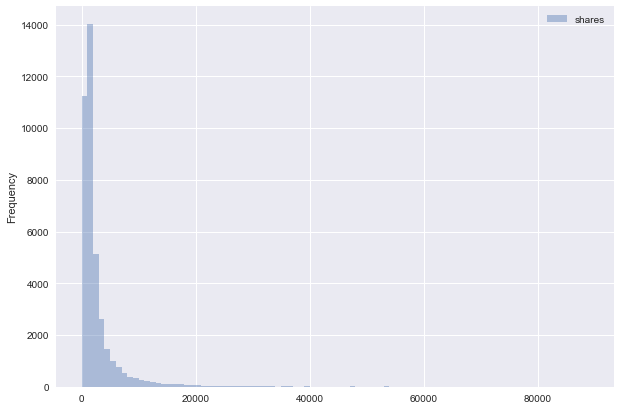

In [7]:
bin_value = np.arange(start=0, stop=90000, step=1000)
plt.figure(figsize=[10,7])
onlinenews_df['shares'].plot(kind='hist', bins=bin_value, alpha=0.4, legend=True)
plt.show()

The target attribute is a continously valued. The average of number of shares is 3395.38 whereas the median is 1400.00. This suggests that a heavily skewed dataset with some outliners influencing the mean of the distribution.

In [10]:
onlinenews_df['popular'] = onlinenews_df['shares'].apply(lambda x: False if x < 1400 else True)

In [11]:
onlinenews_df['popular'].value_counts()

True     21154
False    18490
Name: popular, dtype: int64

In order to better fit into a classificiation model, a new categorical binary target variable target is introduced. And we also choose median of shares as a threshold to define the target attribute. An article is classified as popular when number of shares is equal or more than median of shares, otherwise an article is not popular.

In [12]:
onlinenews_df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,False
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,False
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,True
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,False
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,False
